# Dataset Weather

## Data Analysis Process

# Question 1:
Which city has rainfall with the highest frequency in the year 2016?

# Question 2:
Which month in each city has recorded the highest average temperature in the year 2017?

# Question 3:
What is the maximum and minimum humidity recorded in each city in the year 2017?

# Question 4:
### What is the average of high_wind and low_wind of Beijing city in between July 2016 to February 2017 ?
#### What is the maximum of the average wind calculated above in each month ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.read_csv("E:\AI-ML/dataset_weather.csv")
weather_df

,city,date,temp,humidity,high_wind,low_wind,events
0,Auckland,2016-01-01,65,82,21,28.0,Rain
1,Auckland,2016-01-02,66,94,33,46.0,Rain
2,Auckland,2016-01-03,72,91,18,NaN,Rain
3,Auckland,2016-01-04,66,76,15,NaN,Rain
4,Auckland,2016-01-05,62,69,13,NaN,NaN
...,...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,72,13,16.0,NaN
3651,San Diego,2017-12-28,62,62,14,17.0,Fog
3652,San Diego,2017-12-29,63,58,8,10.0,Fog
3653,San Diego,2017-12-30,61,63,13,17.0,Fog


# Question 1:
Which city has rainfall with the highest frequency in the year 2016?

### Cleaning data


In [3]:
# Check null values

weather_df.isnull().sum()

city            0
date            0
temp            0
humidity        0
high_wind       0
low_wind     1326
events       2217
dtype: int64

In [4]:
# observe the dataypes

weather_df.dtypes

city          object
date          object
temp           int64
humidity       int64
high_wind      int64
low_wind     float64
events        object
dtype: object

In [5]:
# Ensure that there are no rows that contain all NaN values in the data

weather_df = weather_df.dropna(axis = 0)

In [6]:
# Re-Check null values

weather_df.isnull().sum()

city         0
date         0
temp         0
humidity     0
high_wind    0
low_wind     0
events       0
dtype: int64

In [7]:
# Required date to convert dates

weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df['year'] = weather_df['date'].dt.year

<ipython-input-7-a1e8cab7a063>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['date'] = pd.to_datetime(weather_df['date'])
<ipython-input-7-a1e8cab7a063>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['year'] = weather_df['date'].dt.year


In [8]:
# Ensure that the columns are of the appropriate data types

weather_df["events"]= weather_df["events"].astype('string')
print(weather_df.dtypes)

city                 object
date         datetime64[ns]
temp                  int64
humidity              int64
high_wind             int64
low_wind            float64
events               string
year                  int64
dtype: object


<ipython-input-8-547a8cf8d3a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["events"]= weather_df["events"].astype('string')


### Analysis

In [9]:
#  Frequency of rainfall events in each city

rainfall_df = weather_df[(weather_df['year']==2016)&(weather_df['events']=="Rain")] 
rainfall_df

,city,date,temp,humidity,high_wind,low_wind,events,year
0,Auckland,2016-01-01,65,82,21,28.0,Rain,2016
1,Auckland,2016-01-02,66,94,33,46.0,Rain,2016
6,Auckland,2016-01-07,66,65,22,25.0,Rain,2016
7,Auckland,2016-01-08,70,92,21,28.0,Rain,2016
8,Auckland,2016-01-09,66,81,18,29.0,Rain,2016
...,...,...,...,...,...,...,...,...
3280,San Diego,2016-12-22,61,87,20,27.0,Rain,2016
3281,San Diego,2016-12-23,61,80,14,17.0,Rain,2016
3282,San Diego,2016-12-24,57,67,33,41.0,Rain,2016
3288,San Diego,2016-12-30,60,68,9,12.0,Rain,2016


In [10]:
 

citywise_rainfall = rainfall_df.groupby('city').count()['events']
citywise_rainfall

city
Auckland     71
Beijing      24
Chicago      67
Mumbai       71
San Diego    46
Name: events, dtype: int64

In [11]:
# The city which has maximum frequency of rainfall.

print("Max Frequency:=" ,citywise_rainfall.max())
print("City Name:=", citywise_rainfall.idxmax())

Max Frequency:= 71
City Name:= Auckland


### Plotting

In [12]:
cities = weather_df['city'].unique
cities

<bound method Series.unique of 0        Auckland
1        Auckland
6        Auckland
7        Auckland
8        Auckland
          ...    
3649    San Diego
3651    San Diego
3652    San Diego
3653    San Diego
3654    San Diego
Name: city, Length: 885, dtype: object>

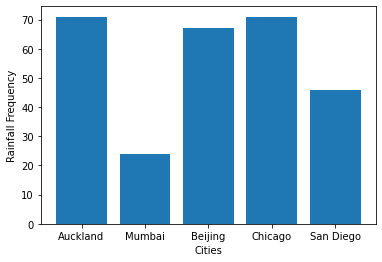

In [16]:


plt.bar(cities, citywise_rainfall)
plt.xlabel('Cities')
plt.ylabel('Rainfall Frequency')
plt.show()

# Question 2:
Which month in each city has recorded the highest average temperature in the year 2017?

### Cleaning

In [17]:
# Add new columns if needed

weather_df['month'] = weather_df['date'].dt.month
weather_month_names_df = weather_df.copy()
weather_month_names_df["month"].replace({1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}, inplace=True)
weather_month_names_df

<ipython-input-17-ce3523a5e287>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df['month'] = weather_df['date'].dt.month


,city,date,temp,humidity,high_wind,low_wind,events,year,month
0,Auckland,2016-01-01,65,82,21,28.0,Rain,2016,January
1,Auckland,2016-01-02,66,94,33,46.0,Rain,2016,January
6,Auckland,2016-01-07,66,65,22,25.0,Rain,2016,January
7,Auckland,2016-01-08,70,92,21,28.0,Rain,2016,January
8,Auckland,2016-01-09,66,81,18,29.0,Rain,2016,January
...,...,...,...,...,...,...,...,...,...
3649,San Diego,2017-12-26,56,73,10,13.0,Fog,2017,December
3651,San Diego,2017-12-28,62,62,14,17.0,Fog,2017,December
3652,San Diego,2017-12-29,63,58,8,10.0,Fog,2017,December
3653,San Diego,2017-12-30,61,63,13,17.0,Fog,2017,December


### Analysis

In [18]:
# Find the average temperatures of each city in every month of 2017.

weather_2017_df = weather_month_names_df[(weather_month_names_df['year']==2017)]
monthly_avg_temp = weather_2017_df.groupby(['city','month'])['temp'].mean()
monthly_avg_temp_df = pd.DataFrame(monthly_avg_temp)
monthly_avg_temp_df.rename(columns={"temp": "avg_temp"}, inplace=True)

 

In [19]:
monthly_avg_temp_df

avg_temp
city      month               
Auckland  April      64.000000
          August     56.714286
          December   68.500000
          February   70.666667
          January    66.166667
          July       52.625000
          June       57.666667
          March      70.000000
          May        59.555556
          November   60.000000
          October    56.000000
          September  55.333333
Beijing   August     78.900000
          December   34.000000
          February   32.000000
          January    29.333333
          July       80.625000
          June       74.555556
          March      46.000000
          May        73.000000
          October    51.333333
          September  72.500000
Chicago   April      52.250000
          August     74.000000
          December   24.733333
          February   42.900000
          January    32.526316
          July       77.142857
          June       74.000000
          March      41.411765
          May        57.000000
          November   40.700000
          October    58.846154
          September  67.166667
Mumbai    August     81.850000
          July       81.444444
          June       84.285714
          May        88.000000
          October    83.750000
          September  81.000000
San Diego April      68.000000
          August     72.666667
          December   59.000000
          February   59.538462
          January    57.928571
          July       74.000000
          June       68.750000
          March      62.666667
          May        61.000000
          November   63.333333
          October    68.000000
          September  75.400000

In [20]:
# Find the month in which each city has the highest average temperature

monthly_avg_temp_df.reset_index(inplace = True)
max_temp_indices = monthly_avg_temp_df.groupby('city')['avg_temp'].idxmax()
max_monthly_temp_df = monthly_avg_temp_df.loc[max_temp_indices]
max_monthly_temp_df

,city,month,avg_temp
3,Auckland,February,70.666667
16,Beijing,July,80.625000
27,Chicago,July,77.142857
37,Mumbai,May,88.000000
51,San Diego,September,75.400000


### Plotting

In [21]:
cities = max_monthly_temp_df['city']
cities

3      Auckland
16      Beijing
27      Chicago
37       Mumbai
51    San Diego
Name: city, dtype: object

In [22]:
avg_temperatures = max_monthly_temp_df['avg_temp']
avg_temperatures

3     70.666667
16    80.625000
27    77.142857
37    88.000000
51    75.400000
Name: avg_temp, dtype: float64

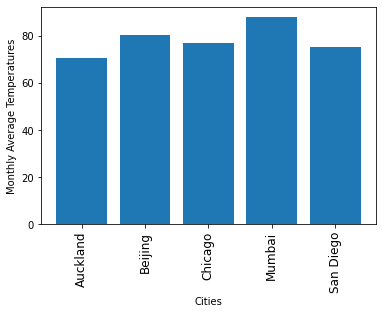

In [23]:
plt.bar(cities, avg_temperatures)
plt.xticks(cities, rotation = 'vertical', size = 12)
plt.xlabel('Cities')
plt.ylabel('Monthly Average Temperatures')
plt.show()

# Question 3:
What is the maximum and minimum humidity recorded in each city in the year 2017?

### Analysis

In [24]:
# Get the data of year 2017.

weather_2017_df = weather_df[(weather_df['year']==2017)]
weather_2017_df

,city,date,temp,humidity,high_wind,low_wind,events,year,month
368,Auckland,2017-01-03,72,86,22,30.0,Rain,2017,1
369,Auckland,2017-01-04,64,76,26,34.0,Rain,2017,1
380,Auckland,2017-01-15,70,82,25,36.0,Rain,2017,1
385,Auckland,2017-01-20,62,61,24,29.0,Rain,2017,1
386,Auckland,2017-01-21,61,75,47,62.0,"Rain , Hail",2017,1
...,...,...,...,...,...,...,...,...,...
3649,San Diego,2017-12-26,56,73,10,13.0,Fog,2017,12
3651,San Diego,2017-12-28,62,62,14,17.0,Fog,2017,12
3652,San Diego,2017-12-29,63,58,8,10.0,Fog,2017,12
3653,San Diego,2017-12-30,61,63,13,17.0,Fog,2017,12


In [25]:
# Find the maximum and minimum humidity of each city in that data

city_weather_df = weather_2017_df.groupby('city')
humidity_df = city_weather_df['humidity'].agg(['max', 'min'])
humidity_df

,max,min
city,,
Auckland,96,59
Beijing,93,19
Chicago,96,47
Mumbai,95,69
San Diego,88,41


### Plotting

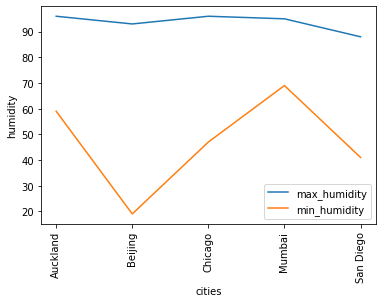

In [26]:
cities = humidity_df.index.values
max_humidity = humidity_df['max']
min_humidity = humidity_df['min']
plt.plot(cities, max_humidity, label='max humidity')
plt.plot(cities, min_humidity, label='min humidity')

plt.xticks(cities, rotation='vertical')
plt.xlabel('cities')
plt.ylabel('humidity')
plt.legend(["max_humidity", "min_humidity"]) 

plt.show()

# Question 4:
### What is the average of high_wind and low_wind of Beijing city in between July 2016 to February 2017 ?
### What is the maximum of the average wind calculated above in each month ?

### Analysis

In [27]:
# Get the data of Beijing between July 2016 and February 2017.
 
beijing_df = weather_df[(weather_df['city']=='Beijing')&(((weather_df['year']==2016)&(weather_df['month']>6))|((weather_df['year']==2017)&(weather_df['month']<3)))]
beijing_df

,city,date,temp,humidity,high_wind,low_wind,events,year,month
1655,Beijing,2016-07-12,81,68,13,18.0,Rain,2016,7
1657,Beijing,2016-07-14,81,54,13,25.0,Rain,2016,7
1663,Beijing,2016-07-20,72,92,18,34.0,Rain,2016,7
1666,Beijing,2016-07-23,82,83,27,38.0,"Rain , Thunderstorm",2016,7
1668,Beijing,2016-07-25,82,82,11,22.0,"Rain , Thunderstorm",2016,7
1673,Beijing,2016-07-30,82,85,11,18.0,"Rain , Thunderstorm",2016,7
1680,Beijing,2016-08-06,84,78,11,22.0,Thunderstorm,2016,8
1687,Beijing,2016-08-13,82,69,16,27.0,Rain,2016,8
1689,Beijing,2016-08-15,76,68,11,22.0,Rain,2016,8
1691,Beijing,2016-08-17,78,83,7,13.0,Rain,2016,8


In [28]:
# Add a average_wind column that contains the average of high_wind and low_wind of each day.

wind_cols = beijing_df.loc[: , ["high_wind","low_wind"]]
beijing_df['average_wind'] = wind_cols.mean(axis=1)
wind_cols

<ipython-input-28-4867f7d728e3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beijing_df['average_wind'] = wind_cols.mean(axis=1)


,high_wind,low_wind
1655,13,18.0
1657,13,25.0
1663,18,34.0
1666,27,38.0
1668,11,22.0
1673,11,18.0
1680,11,22.0
1687,16,27.0
1689,11,22.0
1691,7,13.0


In [29]:
# Find the maximum of average_wind of each month from the above data.

max_wind = beijing_df.groupby(['year', 'month'])['average_wind'].max().reset_index()
max_wind["month"].replace({1: "Jan", 2: "Feb", 7: "July", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}, inplace=True)
max_wind

,year,month,average_wind
0,2016,July,32.5
1,2016,Aug,25.5
2,2016,Sep,32.5
3,2016,Oct,21.5
4,2016,Nov,33.5
5,2017,Jan,44.0
6,2017,Feb,36.5


### Plotting

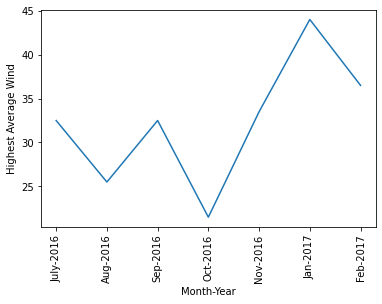

In [30]:
month_year = max_wind['month'] + '-' + max_wind['year'].astype('string')
month_year = month_year.to_list()

average_wind = max_wind['average_wind']
plt.plot(month_year, average_wind)

plt.xticks(month_year, rotation='vertical')
plt.ylabel('Highest Average Wind')
plt.xlabel('Month-Year')
plt.show()